In [2]:
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [1]:
import networkx as nx

In [3]:
#Load Edges 
f_path = abspath("edges.txt")
if exists(f_path):
    with open(f_path) as graph_file:
        lines = [line.split() for line in graph_file]
a = np.array(lines).astype(int)
a[0:5]

array([[ 267, 1394],
       [ 267,  483],
       [ 267, 1051],
       [ 904, 1479],
       [ 904,  919]])

In [4]:
#Load Nodes
f_path = abspath("nodes.txt")
idx2name = []
idx2label = []
idx2node = []
if exists(f_path):
    with open(f_path) as fid:
        for line in fid.readlines():
            name = line.split("\t", 2)[1]
            idx2name.append(name[:-1])
            node = line.split("\t", 2)[0]
            idx2node.append(int(node))
            label = line.split("\t", 2)[2][0]
            #label = label.split("\t", 1)
            idx2label.append(label)
print(idx2name[0:5])
print(idx2node[0:5])
print(idx2label[0:5])

['"100monkeystyping.com', '"12thharmonic.com/wordpress', '"40ozblog.blogspot.com', '"4lina.tblog.com', '"750volts.blogspot.com']
[1, 2, 3, 4, 5]
['0', '0', '0', '0', '0']


In [29]:
G = nx.Graph()
G.add_edges_from(a.tolist())
G.number_of_edges()
G.number_of_nodes()

1224

In [22]:
sorted(G.degree())

SyntaxError: invalid syntax (<ipython-input-22-23335cf439dd>, line 6)

In [49]:
(G.subgraph(c) for c in nx.connected_components(G))
nx.connected_components(G)
S=[G.subgraph(c).copy() for c in nx.connected_components(G)]
list(nx.connected_components(G))

[{1,
  2,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  51,
  52,
  53,
  55,
  56,
  58,
  59,
  62,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  72,
  73,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  92,
  93,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  109,
  110,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  121,
  123,
  124,
  125,
  127,
  128,
  129,
  130,
  132,
  133,
  136,
  137,
  138,
  140,
  141,
  142,
  143,
  144,
  145,
  147,
  149,
  150,
  151,
  152,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  162,
  163,
  165,
  166,
  167,
  168,
  170,
  171,
  172,
  173,
  175,
  177,
  178,
  179,
  180,
  181,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,

In [167]:
nodes = []
names = []
labels = []
remove = []
for i in idx2node:
    if i in a:
        nodes.append(i)
        names.append(idx2name[i-1])
        labels.append(idx2label[i-1])
    else:
        remove.append(i)
print(nodes[0:5])
print(names[0:5])
print(labels[0:5])
print(remove[0:5])

[1, 2, 5, 6, 7]
['"100monkeystyping.com', '"12thharmonic.com/wordpress', '"750volts.blogspot.com', '"95theses.blogspot.com', '"abbadabbaduo.blogspot.com']
['0', '0', '0', '0', '0']
[3, 4, 25, 48, 49]


In [168]:
new_nodes = list(range(1,len(nodes)+1))
new_nodes[0:5]

[1, 2, 3, 4, 5]

In [173]:
for i in range(0,len(a)):
    a[i][0] = nodes.index(a[i][0])+1
    a[i][1] = nodes.index(a[i][1])+1
a[0:5]

array([[ 209, 1139],
       [ 209,  377],
       [ 209,  840],
       [ 719, 1215],
       [ 719,  731]])

In [174]:
a[:,1]-1

array([1138,  376,  839, ..., 1166, 1151,  922])

In [181]:
# spectral clustering
n = len(new_nodes)
k = 2

i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()

In [188]:
A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
A = (A + np.transpose(A))/2
print(A)

  (0, 1)	0.5
  (0, 18)	0.5
  (0, 20)	0.5
  (0, 47)	0.5
  (0, 56)	0.5
  (0, 71)	0.5
  (0, 96)	0.5
  (0, 126)	0.5
  (0, 155)	0.5
  (0, 192)	0.5
  (0, 203)	0.5
  (0, 204)	0.5
  (0, 253)	0.5
  (0, 286)	0.5
  (0, 340)	0.5
  (0, 376)	0.5
  (0, 389)	0.5
  (0, 445)	0.5
  (0, 450)	0.5
  (0, 497)	0.5
  (0, 498)	0.5
  (0, 500)	1.0
  (0, 517)	0.5
  (0, 908)	0.5
  (0, 1007)	0.5
  :	:
  (1220, 1031)	0.5
  (1220, 1044)	0.5
  (1220, 1113)	0.5
  (1220, 1177)	0.5
  (1220, 1179)	0.5
  (1221, 1222)	0.5
  (1222, 601)	1.0
  (1222, 672)	0.5
  (1222, 673)	1.0
  (1222, 764)	0.5
  (1222, 769)	0.5
  (1222, 772)	0.5
  (1222, 800)	1.0
  (1222, 807)	0.5
  (1222, 808)	0.5
  (1222, 819)	0.5
  (1222, 828)	1.0
  (1222, 903)	0.5
  (1222, 1096)	0.5
  (1222, 1111)	0.5
  (1222, 1164)	0.5
  (1222, 1179)	0.5
  (1222, 1180)	0.5
  (1222, 1221)	0.5
  (1223, 624)	0.5


In [160]:
D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
        
L = D @ A @ D
L

array([[0.        , 0.02777778, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02777778, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.21320072,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.21320072, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [151]:
v, x = np.linalg.eig(L)
x = x[:, 0:k].real
x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

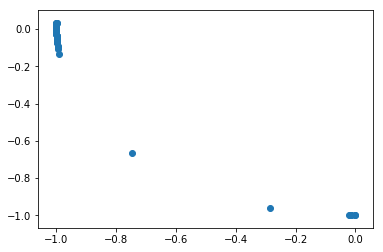

Cluster 1
***************
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [161]:
# scatter
plt.scatter(x[:, 0], x[:, 1])
plt.show()

# k-means
kmeans = KMeans(n_clusters=k).fit(x)
c_idx = kmeans.labels_

# show cluster
for i in range(2):
    print(f'Cluster {i+1}\n***************')
    idx = [index for index, t in enumerate(c_idx) if t == i]
    for index in idx:
        print(labels[index])
    print('\n')